In [2]:
pip install numpy


In [4]:
pip install scikit-learn

In [7]:
pip install matplotlib

In [13]:
import pandas as pd
import numpy as np

df = pd.read_csv("AI Impact.csv")  # downloaded from Kaggle

# Initial audit
print(df.head())
print(df.info())
print(df.isnull().sum())
print("Duplicates:", df.duplicated().sum())
print(df.describe())


             Job_Title  Average_Salary  Years_Experience Education_Level  \
0       Security Guard           45795                28        Master's   
1   Research Scientist          133355                20             PhD   
2  Construction Worker          146216                 2     High School   
3    Software Engineer          136530                13             PhD   
4    Financial Analyst           70397                22     High School   

   AI_Exposure_Index  Tech_Growth_Factor  Automation_Probability_2030  \
0               0.18                1.28                         0.85   
1               0.62                1.11                         0.05   
2               0.86                1.18                         0.81   
3               0.39                0.68                         0.60   
4               0.52                1.46                         0.64   

  Risk_Category  Skill_1  Skill_2  Skill_3  Skill_4  Skill_5  Skill_6  \
0          High     0.45     0.

In [15]:
df.head(10)

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42
5,AI Engineer,92592,11,Master's,0.29,0.51,0.10,Low,0.71,0.79,0.61,0.93,0.65,0.91,0.85,0.45,0.10,0.37
6,Mechanic,107373,23,PhD,0.67,1.09,0.41,Medium,0.56,0.38,0.97,0.85,0.72,0.24,0.26,0.04,0.71,0.11
7,Teacher,53419,12,High School,0.20,1.40,0.17,Low,0.56,0.70,0.14,0.60,0.54,0.20,0.94,0.60,0.69,0.88
8,HR Specialist,139225,12,Master's,0.30,0.61,0.48,Medium,0.22,0.42,0.88,0.32,0.12,0.36,0.91,0.27,0.65,0.00
9,Customer Support,85016,2,High School,0.01,1.01,0.80,High,0.22,0.12,0.34,0.94,0.32,0.52,0.70,0.36,0.97,0.96


In [17]:
pip install seaborn

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# 1. Load Data & Audit
df = pd.read_csv('AI Impact.csv')
print("Shape:", df.shape)
print("Missing Values:", df.isnull().sum().sum())
print("Duplicates:", df.duplicated().sum())

# 2. Feature Engineering
# a. Encoding Categorical Variables
label_encoders = {}
for col in ['Job_Title', 'Education_Level', 'Risk_Category']:
    le = LabelEncoder()
    df[f'{col}_Encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le

# b. Feature Binning (Years_Experience -> Junior/Mid/Senior)
bins = [-1, 5, 15, 100]
labels = ['Junior', 'Mid', 'Senior']
df['Experience_Level'] = pd.cut(df['Years_Experience'], bins=bins, labels=labels)
df['Experience_Level_Encoded'] = LabelEncoder().fit_transform(df['Experience_Level'])

# c. Feature Scaling (Standardization)
# Define Features (X) and Target (y)
target_col = 'Average_Salary'
cols_to_drop = ['Job_Title', 'Education_Level', 'Risk_Category', 'Experience_Level', target_col]
X = df.drop(columns=cols_to_drop)
y = df[target_col]

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 3. Feature Selection (Mutual Information)
selector = SelectKBest(score_func=mutual_info_regression, k=5)
selector.fit(X_scaled, y)
selected_features = X_scaled.columns[selector.get_support()]

print("\nTop 5 Features (Mutual Info):", list(selected_features))

# 4. Save Engineered Dataset
df_final = X_scaled.copy()
df_final['Average_Salary'] = y
df_final.to_csv('engineered_ai_impact.csv', index=False)
print("Saved 'engineered_ai_impact.csv'")

Shape: (3000, 18)
Missing Values: 0
Duplicates: 0

Top 5 Features (Mutual Info): ['Skill_2', 'Skill_5', 'Skill_6', 'Job_Title_Encoded', 'Education_Level_Encoded']
Saved 'engineered_ai_impact.csv'



Linear Regression -> MAE: 30253.70 | RMSE: 34875.26 | R2: 0.0020

Random Forest -> MAE: 30502.40 | RMSE: 35221.55 | R2: -0.0179

Superior Model: Linear Regression


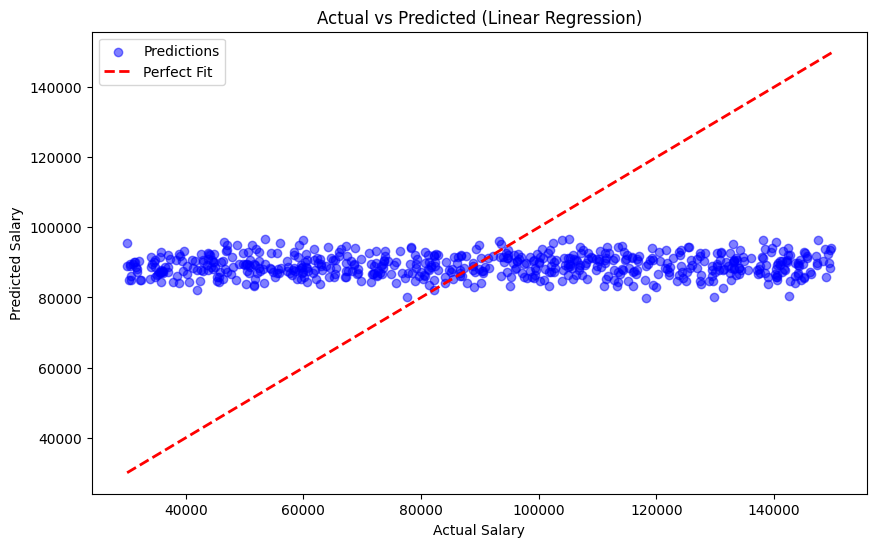

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Train Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# 3. Evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {'R2': r2, 'RMSE': rmse, 'Preds': y_pred}
    print(f"\n{name} -> MAE: {mae:.2f} | RMSE: {rmse:.2f} | R2: {r2:.4f}")

# 4. Justification & Visualization
best_model = "Linear Regression" # Based on R2 score comparison
print(f"\nSuperior Model: {best_model}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, results[best_model]['Preds'], alpha=0.5, color='blue', label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Fit')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title(f"Actual vs Predicted ({best_model})")
plt.legend()
plt.savefig('regression_plot.png')

In [23]:
pip install spacy

Accuracy: 0.5531

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.57      0.56      3128
           1       0.56      0.54      0.55      3140

    accuracy                           0.55      6268
   macro avg       0.55      0.55      0.55      6268
weighted avg       0.55      0.55      0.55      6268


Top 10 Informative Tokens (Win): ['raptor', 'buck', 'nugget', 'maverick', 'celtic', 'steal', 'assist', 'scored', 'point', 'rebound']

Custom Test Results:
'The Lakers scored 130 points with high assists against the Celtics.' -> Win
'The team scored only 80 points and had many turnovers.' -> Loss
'Golden State Warriors scored 120 points with 30 assists.' -> Win
'The Bulls played poorly scoring 70 points.' -> Loss
'The Heat defended well and scored 110 points.' -> Win


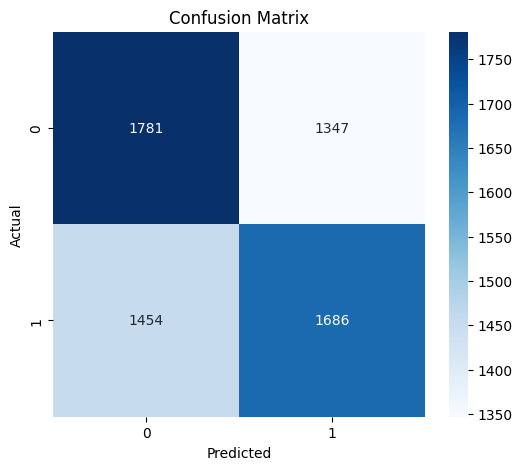

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Dataset
df = pd.read_csv('final_data.csv')

# 2. Synthesize Text for NLP (converting tabular data to text)
def create_text(row):
    home = str(row['HOME_TEAM']) if pd.notnull(row['HOME_TEAM']) else "Opponent"
    # Template: "The [City] [Team] scored [PTS] points..."
    return f"The {row['TEAM_CITY']} {row['TEAM_NAME']} scored {row['PTS']} points with {row['AST']} assists and {row['REB']} rebounds against the {home}. They had {row['STL']} steals."

df['text_description'] = df.apply(create_text, axis=1)
y = df['RESULT'] # Target: 1 (Win) or 0 (Loss)

# 3. Preprocessing (Tokenization, Stopwords, Lemmatization)
# Note: Using a manual set to ensure execution without external download dependencies
manual_stopwords = {'the', 'and', 'a', 'to', 'of', 'in', 'with', 'against', 'they', 'had', 'it', 'is', 'was'}

def preprocess_text(text):
    tokens = text.lower().replace('.', '').split()
    clean_tokens = []
    for token in tokens:
        if token not in manual_stopwords and token.isalpha():
            # Simple lemmatization: remove 's' from plurals
            if token.endswith('s') and len(token) > 3:
                token = token[:-1]
            clean_tokens.append(token)
    return ' '.join(clean_tokens)

df['clean_text'] = df['text_description'].apply(preprocess_text)

# 4. Feature Extraction (TF-IDF)
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['clean_text'])

# 5. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train Model (Naive Bayes)
model = MultinomialNB()
model.fit(X_train, y_train)

# 7. Evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual'); plt.xlabel('Predicted')
plt.savefig('confusion_matrix_nlp.png')

# 8. Top 10 Informative Features
feature_names = tfidf.get_feature_names_out()
# Sort by log probability for the 'Win' class (index 1)
top_indices = np.argsort(model.feature_log_prob_[1])[-10:]
print("\nTop 10 Informative Tokens (Win):", [feature_names[i] for i in top_indices])

# 9. Custom Predictions
custom_sentences = [
    "The Lakers scored 130 points with high assists against the Celtics.",
    "The team scored only 80 points and had many turnovers.",
    "Golden State Warriors scored 120 points with 30 assists.",
    "The Bulls played poorly scoring 70 points.",
    "The Heat defended well and scored 110 points."
]
custom_vec = tfidf.transform([preprocess_text(s) for s in custom_sentences])
predictions = model.predict(custom_vec)

print("\nCustom Test Results:")
for sent, pred in zip(custom_sentences, predictions):
    print(f"'{sent}' -> {'Win' if pred == 1 else 'Loss'}")